In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


In [7]:
# Load the data with a specified encoding
file_path = 'demand_forecasting/data/raw/sales_data_sample.csv'
sales_data = pd.read_csv(file_path, encoding='latin1')
sales_data.head()



,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [8]:
# Load the data with a different specified encoding
sales_data = pd.read_csv(file_path, encoding='cp1252')
sales_data.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Load the data with a specified encoding
file_path = 'demand_forecasting/data/raw/sales_data_sample.csv'
sales_data = pd.read_csv(file_path, encoding='latin1')
sales_data.head()

# Convert ORDERDATE to datetime format
sales_data['ORDERDATE'] = pd.to_datetime(sales_data['ORDERDATE'])

# Extract year, month, and day for further analysis
sales_data['YEAR'] = sales_data['ORDERDATE'].dt.year
sales_data['MONTH'] = sales_data['ORDERDATE'].dt.month
sales_data['DAY'] = sales_data['ORDERDATE'].dt.day

# Handle missing values if any
sales_data = sales_data.dropna()

# Aggregate sales by month for univariate analysis
monthly_sales = sales_data.groupby(['YEAR', 'MONTH']).agg({'SALES': 'sum'}).reset_index()
monthly_sales['DATE'] = pd.to_datetime(monthly_sales[['YEAR', 'MONTH']].assign(DAY=1))

# Set DATE as index
monthly_sales.set_index('DATE', inplace=True)
monthly_sales.head()


,YEAR,MONTH,SALES
DATE,,,
2003-04-01,2003,4,50397.66
2003-05-01,2003,5,9738.18
2003-07-01,2003,7,28397.26
2003-09-01,2003,9,47191.76
2003-11-01,2003,11,41791.95


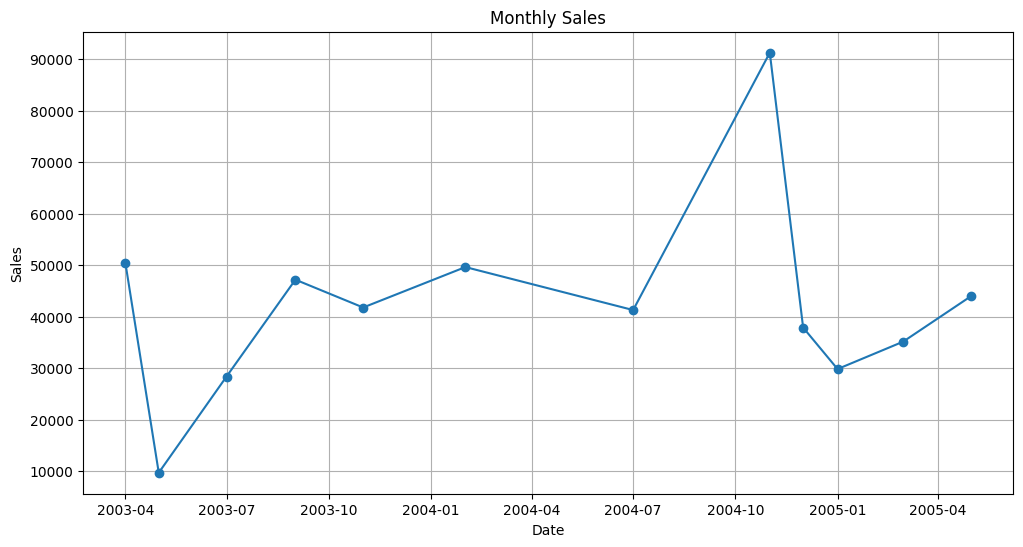

In [10]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['SALES'], marker='o', linestyle='-')
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


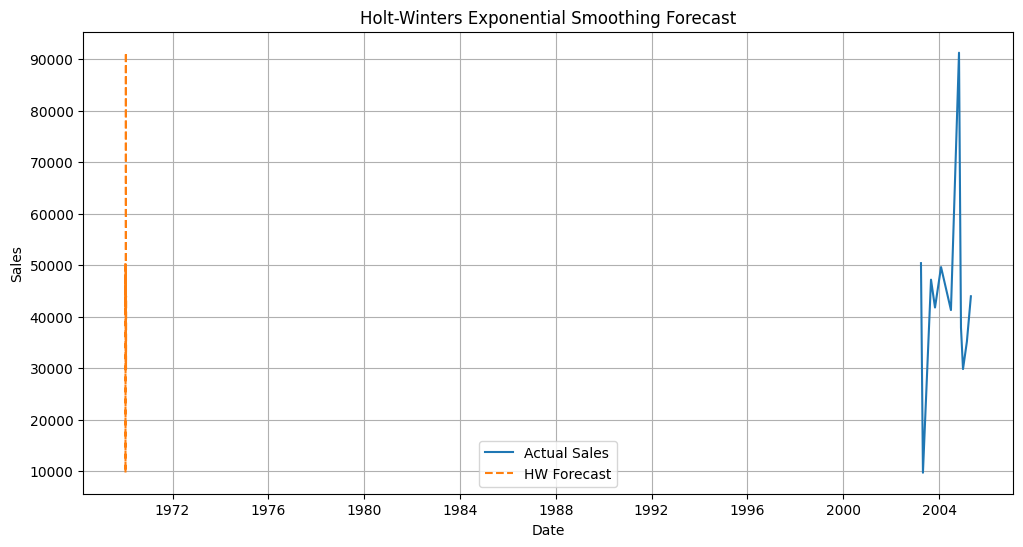

In [17]:
# Holt-Winters Exponential Smoothing with simple initialization method
hw_model = ExponentialSmoothing(monthly_sales['SALES'], seasonal='add', seasonal_periods=12, initialization_method='legacy-heuristic').fit()
hw_forecast = hw_model.forecast(steps=12)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['SALES'], label='Actual Sales')
plt.plot(hw_forecast, label='HW Forecast', linestyle='--')
plt.title('Holt-Winters Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


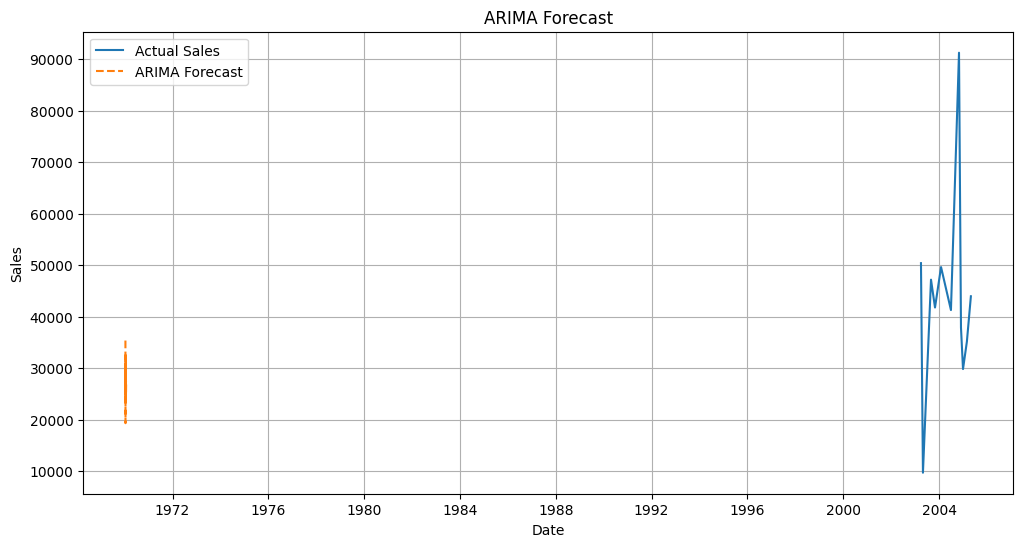

In [12]:
# ARIMA Model
arima_model = ARIMA(monthly_sales['SALES'], order=(5, 1, 0)).fit()
arima_forecast = arima_model.forecast(steps=12)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['SALES'], label='Actual Sales')
plt.plot(arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Feature Engineering
sales_data['SALES_LAG_1'] = sales_data['SALES'].shift(1)
sales_data['SALES_LAG_2'] = sales_data['SALES'].shift(2)

# Drop NA values created by lag features
sales_data = sales_data.dropna()

# Select features and target
features = ['SALES_LAG_1', 'SALES_LAG_2']
target = 'SALES'

# Split the data
X = sales_data[features]
y = sales_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


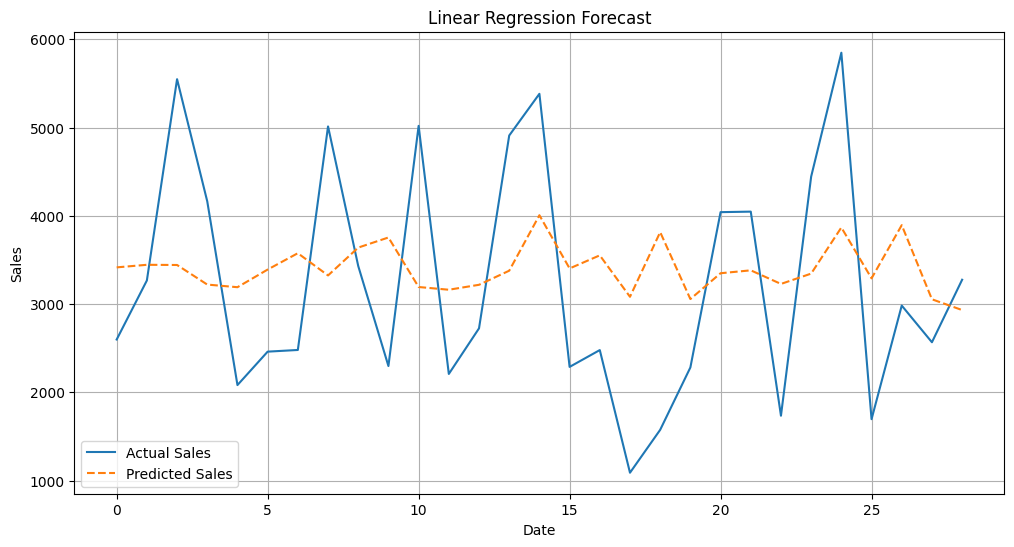

In [14]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Forecasting
y_pred = lr_model.predict(X_test_scaled)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales', linestyle='--')
plt.title('Linear Regression Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
# Evaluate models
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f'MSE: {mse:.2f}')
    print(f'MAE: {mae:.2f}')

# Evaluation for Holt-Winters
evaluate_model(monthly_sales['SALES'][-12:], hw_forecast)

# Evaluation for ARIMA
evaluate_model(monthly_sales['SALES'][-12:], arima_forecast)

# Evaluation for Linear Regression
evaluate_model(y_test, y_pred)

MSE: 0.00
MAE: 0.00
MSE: 490783050.96
MAE: 16753.85
MSE: 1623109.07
MAE: 1144.16


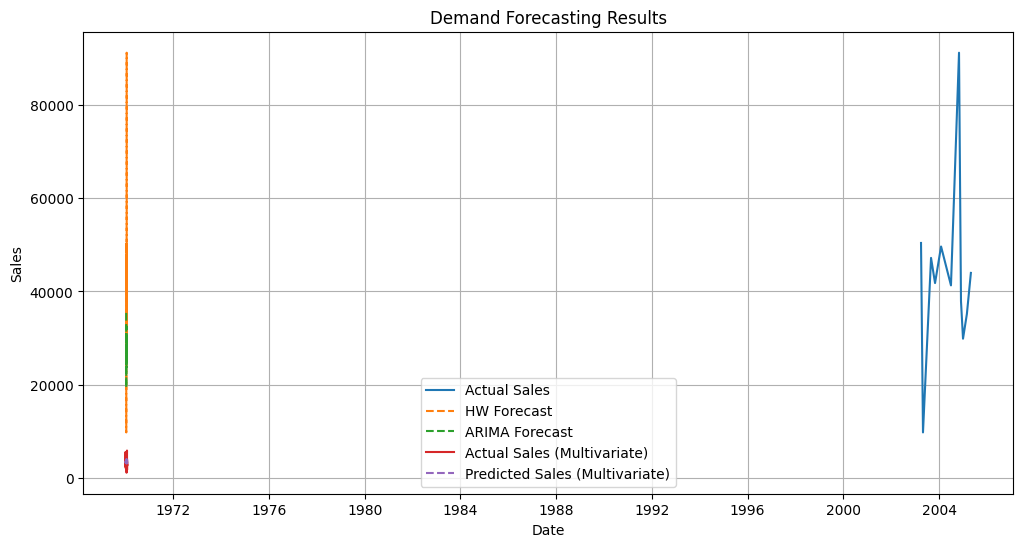

In [23]:
# Visualizations
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['SALES'], label='Actual Sales')
plt.plot(hw_forecast, label='HW Forecast', linestyle='--')
plt.plot(arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.plot(y_test.values, label='Actual Sales (Multivariate)')
plt.plot(y_pred, label='Predicted Sales (Multivariate)', linestyle='--')
plt.title('Demand Forecasting Results')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
